**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups #заменил fetch_mldata на fetch_openml, иначе ошибка при импорте

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [4]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.Train_X = np.asarray(X)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X, leaf_size=2, metric=self.metric)
        self.Train_y = np.asarray(y)
    
    def predict(self, X):
        
        def get_freq(labels):
            label, count = np.unique(labels, return_counts=True)
            return label[np.argmax(count)]
        
        X_n = np.asarray(X)
        if self.algorithm == 'brute':
            dist = cdist(X_n, self.Train_X, metric=self.metric)
            indices = dist.argpartition(self.n_neighbors, axis=1)[:, :self.n_neighbors:]
            labels = np.take(self.Train_y, indices)
            predictions = np.apply_along_axis(get_freq, axis=1, arr=labels)
        if self.algorithm == 'kd_tree':
            dist, indices = self.tree.query(X_n, k=self.n_neighbors)
            labels = np.take(self.Train_y, indices)
            predictions = np.apply_along_axis(get_freq, axis=1, arr=labels)
        return predictions

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [5]:
iris = datasets.load_iris()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [7]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [8]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [9]:
my_clf_pred = my_clf.predict(X_test)

In [10]:
sklearn_pred = clf.predict(X_test)

In [11]:
my_clf_pred

array([1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2])

In [12]:
sklearn_pred

array([1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2])

In [13]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 769 µs, sys: 200 µs, total: 969 µs
Wall time: 812 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 21 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 3.36 ms, sys: 1.28 ms, total: 4.64 ms
Wall time: 3.43 ms


array([1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 2.46 ms, sys: 1.08 ms, total: 3.54 ms
Wall time: 2.62 ms


array([1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [18]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [20]:
%time clf.fit(X_train, y_train)

CPU times: user 1.14 ms, sys: 664 µs, total: 1.8 ms
Wall time: 1.13 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

CPU times: user 235 µs, sys: 23 µs, total: 258 µs
Wall time: 242 µs


In [22]:
%time clf.predict(X_test)

CPU times: user 2.94 ms, sys: 813 µs, total: 3.76 ms
Wall time: 3 ms


array([1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0])

In [23]:
%time my_clf.predict(X_test)

CPU times: user 2.48 ms, sys: 925 µs, total: 3.4 ms
Wall time: 2.43 ms


array([1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0])

In [24]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [82]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [83]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
vectorizer = CountVectorizer(max_df=0.04, min_df=0.008)
num_data_wordBag = vectorizer.fit_transform(data)

In [122]:
tfifdVect = TfidfVectorizer(max_df=0.04, min_df=0.008)
num_data_tfidf = tfifdVect.fit_transform(data)

In [124]:
num_data_wordBag.shape

(11314, 1441)

In [125]:
target.shape

(11314,)

In [131]:
arr_data_bag = num_data_wordBag.toarray()
arr_data_bag

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
arr_data_tfidf = num_data_tfidf.toarray()
arr_data_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
arr_data_tfidf.shape

(11314, 1441)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [134]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold

In [135]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [136]:
cv = KFold(n_splits=3, random_state=42, shuffle=True)

In [52]:
classifiers = []
for train_index, test_index in cv.split(arr_data_bag, target):
    clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
    X_train, X_test = arr_data_bag[train_index], arr_data_bag[test_index]
    y_train, y_test = target[train_index], target[test_index]
    clf.fit(X_train, y_train)
    classifiers.append(clf)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [137]:
def best_neighbors(X, y, metric):
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    scores = np.zeros(10)
    for i in range(1, 11):
        score = 0
        for train_index, test_index in cv.split(X, y):
            clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric=metric)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)
            score += accuracy_score(y_test, predict)
        scores[i-1] = score/3
    return scores, np.argmax(scores)+1

In [138]:
def best_neighbors2(X, y, metric):
    scores = np.zeros(10)
    for i in range(1, 11):
        clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric=metric)
        scores[i-1] = cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean()
    return scores, np.argmax(scores)+1

In [193]:
score, n_neighbors = best_neighbors2(arr_data_tfidf, target, metric='cosine')

In [194]:
score

array([0.2683396 , 0.25711451, 0.25198795, 0.25128129, 0.25331428,
       0.25481655, 0.25393224, 0.2567608 , 0.25296059, 0.2521649 ])

In [195]:
n_neighbors

1

In [139]:
Eucl_score_bag, _ = best_neighbors2(arr_data_bag, target, metric='euclidean')

In [140]:
Eucl_score_bag

array([0.28442579, 0.24589011, 0.25790966, 0.26206328, 0.26338963,
       0.26674804, 0.26957671, 0.26657153, 0.26506926, 0.26551132])

In [142]:
Cos_score_bag, _ = best_neighbors2(arr_data_bag, target, metric='cosine')

In [143]:
Cos_score_bag

array([0.38403728, 0.37007292, 0.3915501 , 0.41161376, 0.42522489,
       0.43759868, 0.44440498, 0.45271342, 0.45766322, 0.46270118])

In [144]:
Eucl_score_tfidf, _ = best_neighbors2(arr_data_tfidf, target, metric='euclidean')

In [145]:
Eucl_score_tfidf

array([0.20417164, 0.14733983, 0.16024325, 0.15476335, 0.1508743 ,
       0.14521751, 0.14088682, 0.13982626, 0.1364679 , 0.13505381])

In [146]:
Cos_score_tfidf, _ = best_neighbors2(arr_data_tfidf, target, metric='cosine')

In [147]:
Cos_score_tfidf

array([0.3908433 , 0.37802785, 0.40030072, 0.41886217, 0.43485954,
       0.44811781, 0.45739816, 0.4601382 , 0.46482287, 0.47339609])

In [148]:
n_neighbors = np.arange(1, 11)

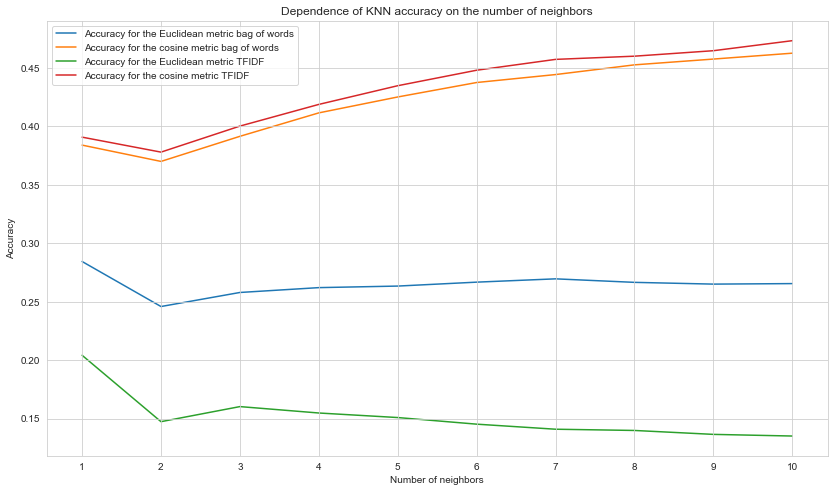

In [149]:
fig = plt.figure(figsize= (14,8))
ax1 = fig.add_subplot(111)
plt.title("Dependence of KNN accuracy on the number of neighbors")
plt.xlabel("Number of neighbors") 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel("Accuracy") 
sns.set_style("whitegrid", {'axes.axisbelow': False, 'axes.grid': True})
ax1.plot(n_neighbors, Eucl_score_bag, label = "Accuracy for the Euclidean metric bag of words")
ax1.plot(n_neighbors, Cos_score_bag, label = "Accuracy for the cosine metric bag of words")
ax1.plot(n_neighbors, Eucl_score_tfidf, label = "Accuracy for the Euclidean metric TFIDF")
ax1.plot(n_neighbors, Cos_score_tfidf, label = "Accuracy for the cosine metric TFIDF")
ax1.legend()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [150]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [151]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [152]:
num_test_tfid = tfifdVect.transform(test_data)

In [153]:
arr_data_test = num_test_tfid.toarray()

In [154]:
arr_data_test.shape

(7532, 1441)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Лучшая точность достигается при tf-idf векторизации и использовании косинусной метрики расстояния. А также при большем числе соседей score увеличивается, поэтому было решено использовать достаточно большое число соседей.

In [156]:
clf = MyKNeighborsClassifier(n_neighbors=300, algorithm='brute', metric='cosine')
clf.fit(arr_data_tfidf, target)
predict = clf.predict(arr_data_test)
accuracy_score(predict, test_target)

0.5018587360594795

# Выводы

Еще раз отмечу, что лучшая точность достигается при tf-idf векторизации и использовании косинусной метрики расстояния, а также при большем числе соседей. Поэтому для оценки точности на тестовой выборки было выбрано большое число соседей.